#                       HEART  DISEASE PREDICTION



### TASK INVOLVES

### 1. Gathering and loading the data
### 2. Handling Null values
### 3. Data visualization
### 4. Feature selection
### 5. sampling the data
### 6. spilitting the data
### 7. scaling
### 8. Implementing Artificial Neural Network
### 9. Random forest feature importance
### 10.implementing Random Forest algorthum with Hyper parameter tuning
### 11.Finding Optimal K value For KNN
### 12.implementing K-Nearest Neighbor
### 13. ROC and AUC curve for metrics

# ..................................Importing Libraries.....................................

In [1]:
import pandas as pd # data analysis and manipulation of tabular data
import numpy as np # linear algebra and  mathematical operations on arrays
import seaborn as sns # data visualiaztion
import matplotlib.pyplot as plt # data visualization
from scipy import stats # probabilistic distributions and statistical operations. 
from matplotlib import style # giving more style to our visualization
from matplotlib.gridspec import GridSpec #style
%matplotlib inline

In [2]:
data=pd.read_csv("framingham.csv") # loading data

In [3]:
data.head() # getting top 5 records

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
data.info() # information about features for instance dtype,null count, shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [5]:
data.nunique() # getting unique values in each features

male                  2
age                  39
education             4
currentSmoker         2
cigsPerDay           33
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             248
sysBP               234
diaBP               146
BMI                1363
heartRate            73
glucose             143
TenYearCHD            2
dtype: int64

In [6]:
# getting shape of the datasets
shape=data.shape
print("shape of the dataset is :",shape)
print("******************************")

shape of the dataset is : (4238, 16)
******************************


# .............................Handiling null values...................................

In [7]:
# getting null values in each features
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [23]:
# getting n unique values in each missing features for finding better solution for filling null values
missing_columns = ["glucose", "education","BPMeds","totChol","cigsPerDay","BMI","heartRate"]# all missing features
for i in missing_columns:
    print("Column :", i) # print features
    print(data[i].nunique())# printing n unique
    print("******************************")

Column : glucose
144
******************************
Column : education
4
******************************
Column : BPMeds
2
******************************
Column : totChol
249
******************************
Column : cigsPerDay
34
******************************
Column : BMI
1364
******************************
Column : heartRate
74
******************************


In [9]:
# using fillna methods to fill all null values
data["glucose"].fillna(data["glucose"].mean(),inplace =True)# fill with mean values
data["totChol"].fillna(data["totChol"].mean(),inplace=True)# fill with mean values
data["cigsPerDay"].fillna(data["cigsPerDay"].mean(),inplace=True)# fill with mean values
data["BMI"].fillna(data["BMI"].mean(),inplace=True)# fill with mean values
data["heartRate"].fillna(data["heartRate"].mean(),inplace=True)# fill with mean values
data["education"].fillna(data["education"].median(),inplace=True)# fill with median values
data["BPMeds"].fillna(data["BPMeds"].median(),inplace=True)# fill with median values

In [10]:
# checking wheather null values is filled or not, false means no null value
data.isnull().any()

male               False
age                False
education          False
currentSmoker      False
cigsPerDay         False
BPMeds             False
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol            False
sysBP              False
diaBP              False
BMI                False
heartRate          False
glucose            False
TenYearCHD         False
dtype: bool

# ....................................Calculating statistical data.......................................

In [11]:
data.describe(include="all").transpose()# getting all statistical data of quantity values

,count,mean,std,min,25%,50%,75%,max
male,4238.0,0.429212,0.495022,0.00,0.00,0.00,1.0000,1.0
age,4238.0,49.584946,8.572160,32.00,42.00,49.00,56.0000,70.0
education,4238.0,1.979471,1.007081,1.00,1.00,2.00,3.0000,4.0
currentSmoker,4238.0,0.494101,0.500024,0.00,0.00,0.00,1.0000,1.0
cigsPerDay,4238.0,9.003089,11.879230,0.00,0.00,0.00,20.0000,70.0
BPMeds,4238.0,0.029259,0.168552,0.00,0.00,0.00,0.0000,1.0
prevalentStroke,4238.0,0.005899,0.076587,0.00,0.00,0.00,0.0000,1.0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.00,1.0000,1.0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.00,0.0000,1.0
totChol,4238.0,236.721585,44.326453,107.00,206.00,234.00,262.0000,696.0


# Exploratory Data Analysis

#### univariate Analysis

In [12]:
data.TenYearCHD.unique()# getting unique values in target variable

array([0, 1], dtype=int64)

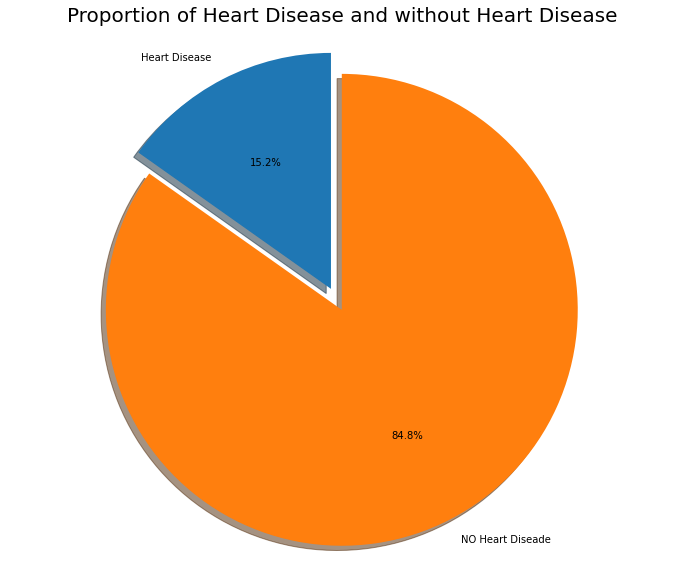

In [13]:
# vizualize our target variable
labels = 'Heart Disease', 'NO Heart Diseade' # labels
sizes = [data.TenYearCHD[data["TenYearCHD"]==1].count(), data.TenYearCHD[data["TenYearCHD"]==0].count()]# count of yes and no
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(12, 10)) # figzize
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)# percentage and angle 
ax1.axis('equal')
plt.title("Proportion of Heart Disease and without Heart Disease", size = 20)# plot title
plt.show()

In [14]:
# visualize all quantitive values to find outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


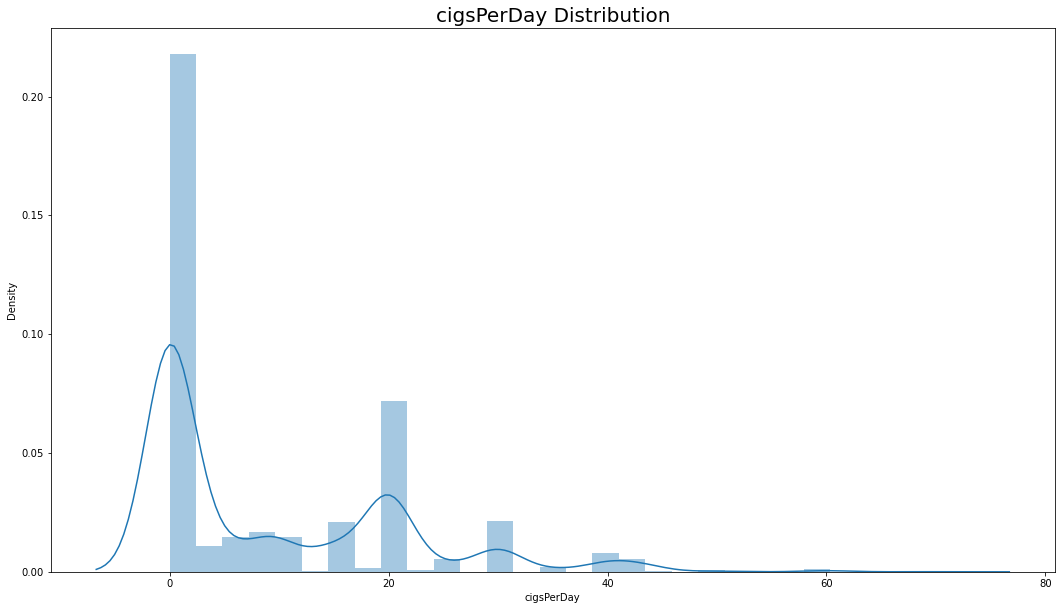

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


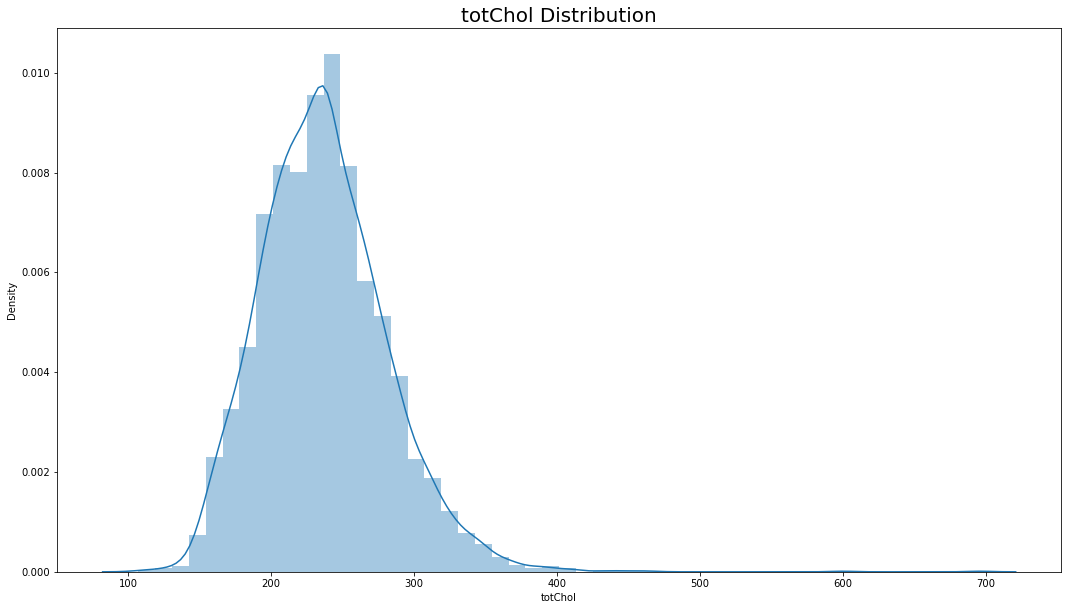

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


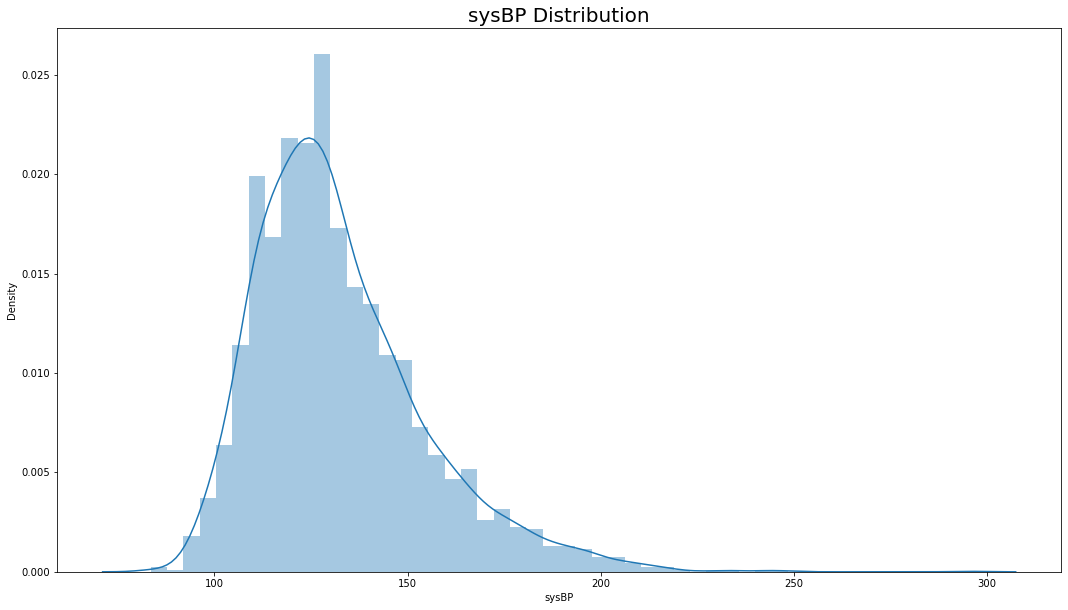

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


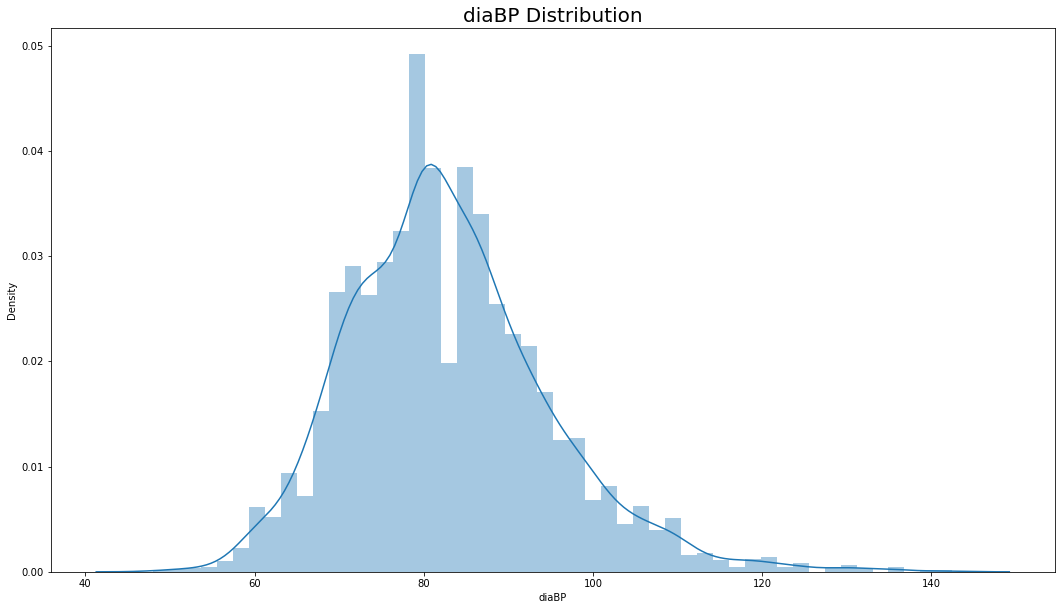

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


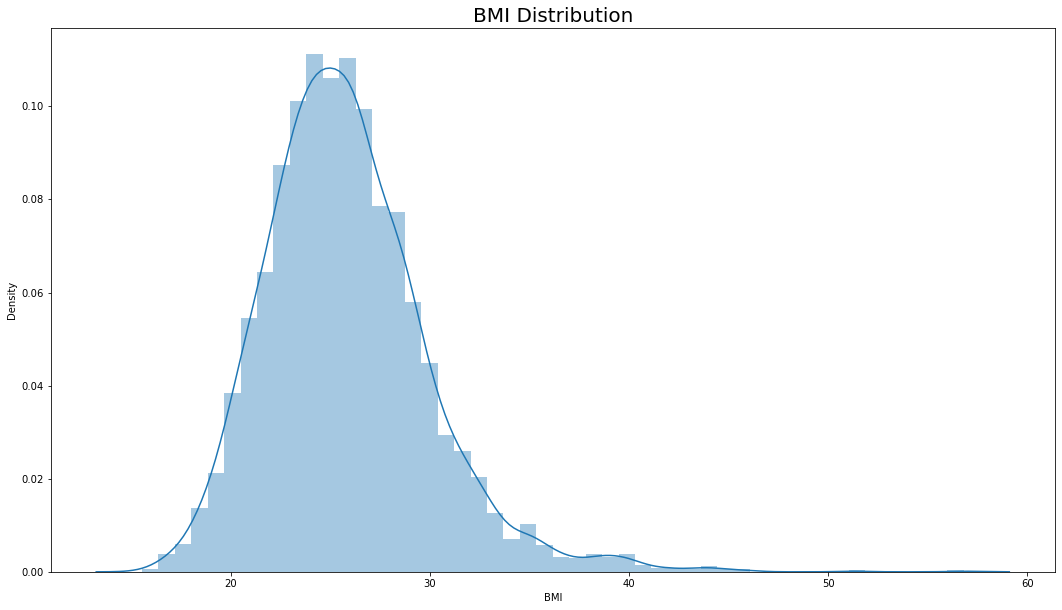

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


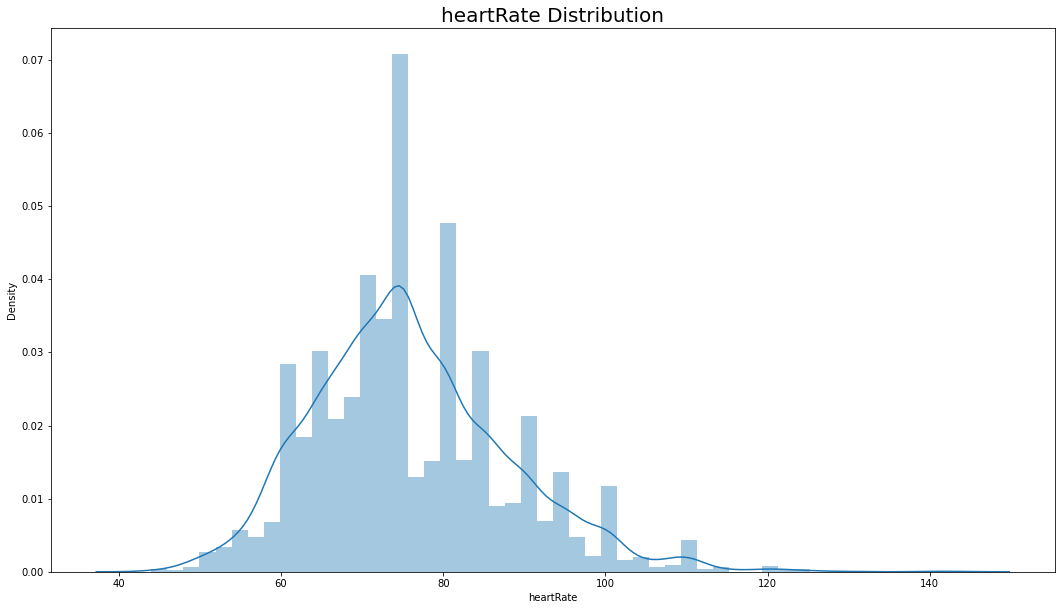

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


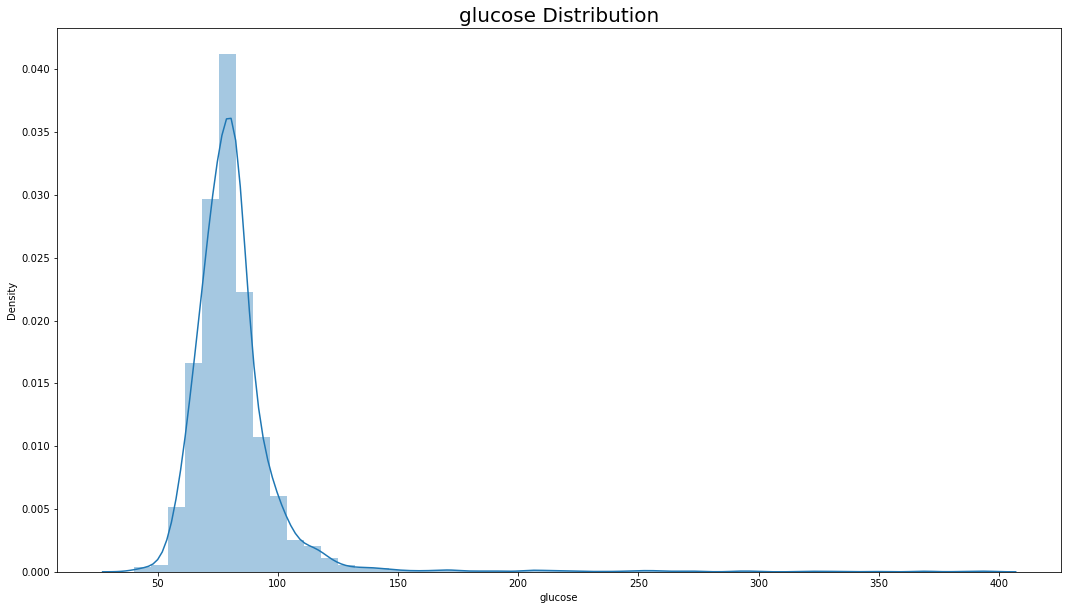

In [15]:
numeric_features =[ 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

for feature in numeric_features:# for loop for chart
    plt.figure(figsize=(18, 10), facecolor='w')# fig size
    sns.distplot(data[feature])# plot in distplot
    plt.title('{} Distribution'.format(feature), fontsize=20)# title
    plt.show()


#### Bivariate Analysis

In [16]:
def labels ():  ### here i creat the function for applying labels in each graphs
    x_axis=plt.gca()
    for px in x_axis.patches:
        x_axis.text(px.get_x() + px.get_width()/2, px.get_height(), '%d' % int(px.get_height()),fontsize=13,color='red',rotation = 45,ha='center',va='bottom')
# this can plot with values 

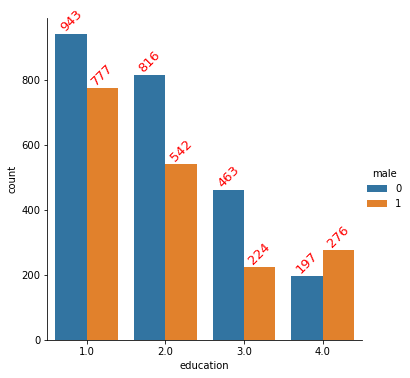

In [17]:
sns.catplot(x='education',kind='count',hue = 'male',data=data)  ### comparing education by gender 0 means female, 1 means male
labels() # function calling

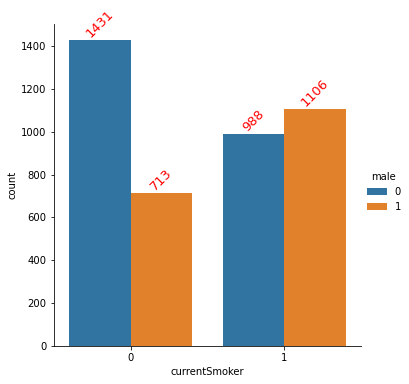

In [18]:
sns.catplot(x="currentSmoker",kind='count',hue = 'male',data=data)  ### comparing currentsmoker by gender
labels() # calling function

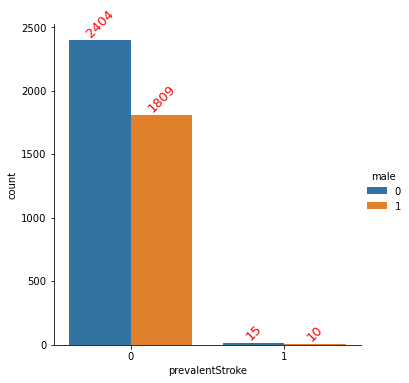

In [19]:
sns.catplot(x="prevalentStroke",kind='count',hue = 'male',data=data)  ### comparing prevalentstroke by gender
labels() #function calling

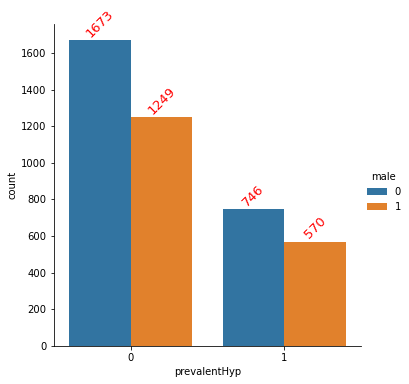

In [20]:
sns.catplot(x="prevalentHyp",kind='count',hue = 'male',data=data)  ### comparing prevalenthyp by gender
labels() # function calling

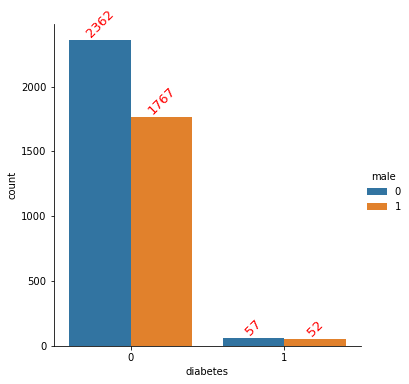

In [21]:
sns.catplot(x="diabetes",kind='count',hue = 'male',data=data)  ### comparing diabetes by gender
labels() # function calling

### conclusion:- this dataset does not contains any outlier and there is not need to do label encoding because it contains numeric values.moreover,as per data analysis our dataset is imbalance, so need to use various techniques for instance SMOTE to balance our dataset before building the model for avoiding bias.

# ..................................splitting the data .........................................

In [22]:
X= data.drop(['TenYearCHD'],axis='columns') ### assigning independent features
Y=data.TenYearCHD  ### assigning dependent features

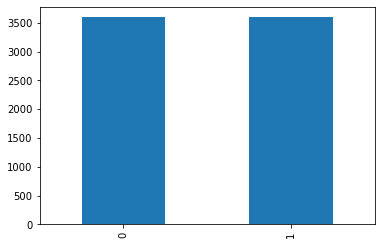

In [23]:
# SMOTE methods to balance our datasets , its gives equal entity to both values in opur target variable
from imblearn.over_sampling import SMOTE # SMOTE library
smote = SMOTE() # object the smote methods
X_sample, Y_sample = smote.fit_resample(X,Y) # sampling the datasets
plot=Y_sample.value_counts().plot(kind='bar')# ploting the sampling dataset
plt.show()


In [24]:
# splitting the 80 % data for train and 20 % for  test for reduce the overfitting
from sklearn.model_selection import train_test_split, StratifiedKFold # stratifiedkfold for cross validation, it gives
#equal priority for both values.

x_trains, x_tests, y_trains, y_tests = train_test_split(X_sample,Y_sample,
                                                    stratify=Y_sample,
                                                    test_size=0.2,
                                                    random_state=42)

In [25]:
# showing shape of the data after sampling 
test_size=y_tests.value_counts() # value counts in y test 
print("Test size after sampling:", test_size)
print("******************************")
train_size=y_trains.value_counts()# value counts in y train
print("Train size after sampling :",  train_size)

Test size after sampling: 0    719
1    719
Name: TenYearCHD, dtype: int64
******************************
Train size after sampling : 0    2875
1    2875
Name: TenYearCHD, dtype: int64


# .....................................Feature selection..................................................

<AxesSubplot:>

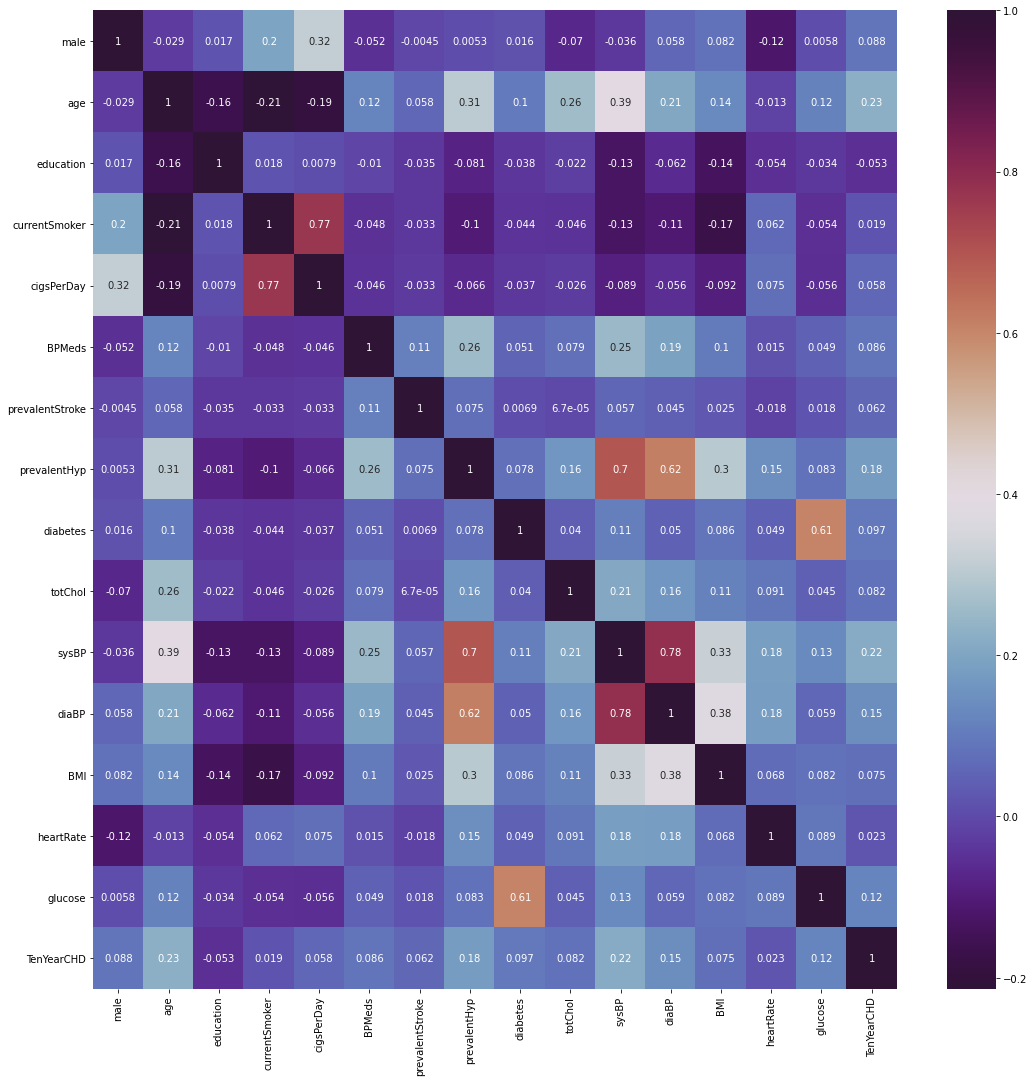

In [26]:
# co-relation in heat map for identify the corelation of features
plt.figure(figsize=(18,18))
sns.heatmap(data.corr(),annot=True,cmap= 'twilight_shifted')

In [27]:
# this function return the higher co relation features, morethan desire threshold
def correlation(dataset, threshold):
    col_corr = set()  ### creat a set for place a corelated columns
    co_pearson = dataset.corr() # showing corelation values
    for i in range(len(co_pearson.columns)):
        for j in range(i):
            if abs (co_pearson.iloc[i, j]) > threshold: ### abs for negative corelation
                colname = co_pearson.columns[i]    
                col_corr.add(colname)
    return col_corr

In [28]:
co_columns = correlation(x_trains, 0.85) ### fixing threshold value as 85%
len(set(co_columns))  ### total number of corelation in set

0

In [29]:
#Mutual information  between two random variables is a non-negative value,
# which measures the dependency between the variables. It is equal to zero if and only if two random variables are
#independent, and higher values mean higher dependency.
from sklearn.feature_selection import mutual_info_classif
# finding the mutual information for selecting features
### higher values mean higher dependency and lower values means lower dependency
mutual_info = mutual_info_classif(x_trains, y_trains,random_state=42)
mutual_info

array([0.00559413, 0.06225501, 0.24042878, 0.00584539, 0.17236992,
       0.03142646, 0.        , 0.00264929, 0.        , 0.30036477,
       0.3306292 , 0.34779164, 0.08491113, 0.34439309, 0.35819736])

In [30]:
# indixing the features by decending order
mutual_info = pd.Series(mutual_info)# series
mutual_info.index = x_trains.columns
mutual_info.sort_values(ascending=False)# align from higher values

glucose            0.358197
diaBP              0.347792
heartRate          0.344393
sysBP              0.330629
totChol            0.300365
education          0.240429
cigsPerDay         0.172370
BMI                0.084911
age                0.062255
BPMeds             0.031426
currentSmoker      0.005845
male               0.005594
prevalentHyp       0.002649
prevalentStroke    0.000000
diabetes           0.000000
dtype: float64

<AxesSubplot:>

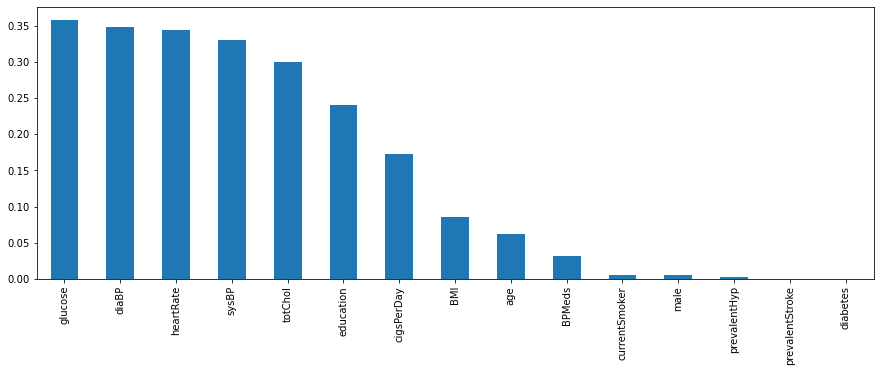

In [31]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5)) # plot the features from high to low depedency

In [32]:
x= data[['glucose', 'diaBP', 'heartRate', 'sysBP',
       'totChol', 'education',"cigsPerDay","BMI"]] # assigning impartance features for x 
x.head(3)

,glucose,diaBP,heartRate,sysBP,totChol,education,cigsPerDay,BMI
0,77.0,70.0,80.0,106.0,195.0,4.0,0.0,26.97
1,76.0,81.0,95.0,121.0,250.0,2.0,0.0,28.73
2,70.0,80.0,75.0,127.5,245.0,1.0,20.0,25.34


In [33]:
y = data.TenYearCHD # assigning y values
y.head(3)

0    0
1    0
2    0
Name: TenYearCHD, dtype: int64

In [34]:
y.value_counts() # value counts of target variable

0    3594
1     644
Name: TenYearCHD, dtype: int64

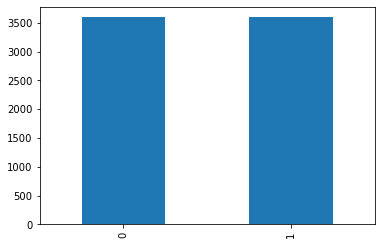

In [35]:
# sampling the data after selecting the features
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_samples, Y_samples = smote.fit_resample(x,y) # assigning selected features
plot=Y_samples.value_counts().plot(kind='bar')
plt.show()

In [36]:
# splitting the 80 % data for train and 20 % for  test for reduce the overfitting, after selecting features
from sklearn.model_selection import train_test_split, StratifiedKFold

X_train, X_test, Y_train, Y_test = train_test_split(X_samples,Y_samples,
                                                    stratify=Y_samples,
                                                    test_size=0.2,
                                                    random_state=42)# 20% fro testing and 80% for training

# .................................Artificial Neural Network...................................

In [37]:
#Performing Feature Scaling
from sklearn.preprocessing import StandardScaler # preprocessing the data using standardscaler
sc = StandardScaler()
X_trains = sc.fit_transform(X_train) # transform the x train
X_tests = sc.transform(X_test) # transform x test

In [38]:
#Initializing Artificial Neural Network
#As a part of tensorflow 2.0, Keras is now integrated with tensorflow and is now considered as a sub-library of tensorflow. 
#The Sequential class is a part of the models module of Keras library which is a part of the tensorflow library now.
import tensorflow as tf # import tenserflow for ann
ann = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=6,activation="relu"), #Adding First Hidden Layer, units is a number of neurans
    tf.keras.layers.Dense(units=6,activation="relu"), #Adding Second Hidden Layer
    tf.keras.layers.Dense(units=1,activation="sigmoid") #Adding Output Layer
])

In [39]:
#Compiling Artificial Neural Network
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [40]:
#Fitting Artificial Neural Network
ann.fit(X_trains,Y_train,batch_size=32,epochs = 200)

Epoch 1/200
180/180 [==============================] - 1s 970us/step - loss: 0.6712 - accuracy: 0.5802
Epoch 2/200
180/180 [==============================] - 0s 858us/step - loss: 0.6585 - accuracy: 0.5941
Epoch 3/200
180/180 [==============================] - 0s 940us/step - loss: 0.6523 - accuracy: 0.5977
Epoch 4/200
180/180 [==============================] - 0s 882us/step - loss: 0.6483 - accuracy: 0.6101
Epoch 5/200
180/180 [==============================] - 0s 850us/step - loss: 0.6456 - accuracy: 0.6219
Epoch 6/200
180/180 [==============================] - 0s 846us/step - loss: 0.6433 - accuracy: 0.6247
Epoch 7/200
180/180 [==============================] - 0s 922us/step - loss: 0.6420 - accuracy: 0.6237
Epoch 8/200
180/180 [==============================] - 0s 856us/step - loss: 0.6408 - accuracy: 0.6299
Epoch 9/200
180/180 [==============================] - 0s 886us/step - loss: 0.6401 - accuracy: 0.6297
Epoch 10/200
180/180 [==============================] - 0s 821us/step - l

180/180 [==============================] - 0s 799us/step - loss: 0.6079 - accuracy: 0.6612
Epoch 158/200
180/180 [==============================] - 0s 814us/step - loss: 0.6082 - accuracy: 0.6630
Epoch 159/200
180/180 [==============================] - 0s 808us/step - loss: 0.6074 - accuracy: 0.6619
Epoch 160/200
180/180 [==============================] - 0s 886us/step - loss: 0.6072 - accuracy: 0.6633
Epoch 161/200
180/180 [==============================] - 0s 785us/step - loss: 0.6076 - accuracy: 0.6614
Epoch 162/200
180/180 [==============================] - 0s 799us/step - loss: 0.6076 - accuracy: 0.6631
Epoch 163/200
180/180 [==============================] - 0s 825us/step - loss: 0.6077 - accuracy: 0.6633
Epoch 164/200
180/180 [==============================] - 0s 819us/step - loss: 0.6074 - accuracy: 0.6621
Epoch 165/200
180/180 [==============================] - 0s 808us/step - loss: 0.6071 - accuracy: 0.6640
Epoch 166/200
180/180 [==============================] - 0s 797us/ste

In [41]:
# evaluating the model
ann.evaluate(X_tests,Y_test)

45/45 [==============================] - 0s 831us/step - loss: 0.6359 - accuracy: 0.6363


[0.6359493732452393, 0.6363004446029663]

In [42]:
#Predicting result using ANN
print(ann.predict(sc.transform([[77.0, 70.0, 80.0, 106.0, 195.0, 4.0, 0.0,26.97]])) > 0.5)# false means 0

[[False]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Random forest  Algorithum with  Feature Importance

In [43]:
# selecting the feature for random forest 
from sklearn.ensemble import RandomForestClassifier # importing random forest library

# First I want to determine the important features.
rf = RandomForestClassifier(oob_score=True , n_estimators=1000)
rf.fit(x_trains , y_trains)# fitting the data
features = pd.Series(rf.feature_importances_ , index= x_trains.columns).sort_values(ascending=False)# indexing the importance 
#features from decending order.

features

education          0.132785
age                0.125899
sysBP              0.120744
totChol            0.100252
diaBP              0.097276
glucose            0.096631
heartRate          0.092346
BMI                0.085318
cigsPerDay         0.074054
currentSmoker      0.025057
BPMeds             0.018738
male               0.014311
prevalentHyp       0.011772
diabetes           0.003913
prevalentStroke    0.000904
dtype: float64

In [44]:
features.index[:8] # indexing the features

Index(['education', 'age', 'sysBP', 'totChol', 'diaBP', 'glucose', 'heartRate',
       'BMI'],
      dtype='object')

In [45]:
x_train_rf = data[features.index[0:8]] # taking selected features
y_train_rf = data['TenYearCHD']# assigning y value

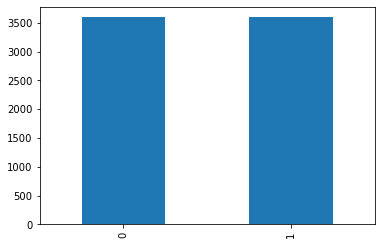

In [46]:
# sampling the selected features using random forest
from imblearn.over_sampling import SMOTE
smote = SMOTE()# smote object
X_samples_rf, Y_samples_rf = smote.fit_resample(x_train_rf,y_train_rf)
plot=Y_samples_rf.value_counts().plot(kind='bar')
plt.show()

In [47]:
X_train_rf, X_test_rf, Y_train_rf, Y_test_rf = train_test_split(X_samples_rf,Y_samples_rf,
                                                    stratify=Y_samples_rf,
                                                    test_size=0.2,
                                                    random_state=42)# splitting data after smpling

# ..................Hyper parameter tuning the Random Forest........................

In [48]:
from sklearn.model_selection import RandomizedSearchCV # library for parameter tuning

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)] # The number of trees in the forest.
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)] ### max_depth indicates the depth of each tree in the forest.
# Minimum number of samples required to split a node
min_samples_split = [2,3,4, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2,3,4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Whether bootstrap samples are used when building trees.
criterion  = ['gini', 'entropy']   ### quality of split

# Create the param grid
param_random = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
             'criterion' : criterion}
param_random

rf = RandomForestClassifier()
### fitting randomsearch CV, it takes 800 fits
rf_random_cv=RandomizedSearchCV(estimator=rf, param_distributions=param_random,  cv = 4, verbose=2,n_iter = 100, random_state=42, n_jobs=-1, return_train_score=True)
rf_random_cv.fit(X_train_rf,Y_train_rf) ### fitting model for finding perfect parameters

Fitting 4 folds for each of 100 candidates, totalling 400 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 23, 45],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [10, 17, 25, 33, 41, 48,
                                                         56, 64, 72, 80]},
                   random_state=42, return_train_score=True, verbose=2)

In [49]:
print(rf_random_cv.best_params_) ## this is the best parameter to achieve max accuracy  

{'n_estimators': 72, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 45, 'criterion': 'entropy', 'bootstrap': False}


In [50]:
print(rf_random_cv.best_estimator_)  ## best estimator

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=45,
                       min_samples_split=5, n_estimators=72)


In [63]:
# building the random forest model
rforest = RandomForestClassifier(max_depth=45, min_samples_split=5,min_samples_leaf= 1, 
                       n_estimators=72,bootstrap=False,criterion= 'entropy')
rforest.fit(X_train_rf, Y_train_rf)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=45,
                       min_samples_split=5, n_estimators=72)

In [64]:
from sklearn.metrics import confusion_matrix # confusion matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score # accuracy
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
Y_predrf = rforest.predict(X_test_rf)## assigning y_prediction for getting accuracy
con_matrix = confusion_matrix(Y_test_rf, Y_predrf) ### confusion matrix
print("Confusion Matrix:")
print(con_matrix )
class_report = classification_report(Y_test_rf, Y_predrf) ### classification report
print("Classification Report:",)
print (class_report)
acc_score = accuracy_score(Y_test_rf,Y_predrf) ### accuracy score
print("Accuracy:",acc_score)

Confusion Matrix:
[[663  56]
 [ 89 630]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       719
           1       0.92      0.88      0.90       719

    accuracy                           0.90      1438
   macro avg       0.90      0.90      0.90      1438
weighted avg       0.90      0.90      0.90      1438

Accuracy: 0.8991655076495132


In [70]:
# calculate recall
recall = recall_score(Y_test_rf, Y_predrf, average='binary')
print('Random Forest Recall Score: %.3f' % recall)
print("*************************************")

 

Random Forest Recall Score: 0.876
*************************************


### since the data is imbalance,recall should be used instead of accuracy score  the Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR , roc and auc is used to find wheather the recall score is statistically significint or not

In [53]:
from sklearn.metrics import roc_auc_score # for finding roc score
from sklearn.metrics import roc_curve # for roc curve
# predict probabilities
pred_prob = rforest.predict_proba(X_test_rf)
fpr, tpr, thresh = roc_curve(Y_test_rf, pred_prob[:,1], pos_label=1)
random_probs = [0 for i in range(len(Y_test_rf))]
p_fpr, p_tpr, _ = roc_curve(Y_test_rf, random_probs, pos_label=1)
auc_score = roc_auc_score(Y_test_rf, pred_prob[:,1])
print(auc_score)

0.9602939099854726


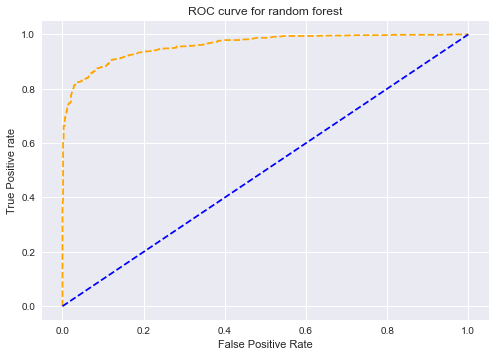

In [54]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange')# plot score rate in orange colour

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve for random forest')# title
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')


plt.savefig('ROC',dpi=300)
plt.show();

# ..........................KNeighborsClassifier.......................................

In [56]:
#Normalisasi Data using standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_samples)
scaled= scaler.transform(X_samples)
scaled_data = pd.DataFrame(scaled, columns= X_samples.columns)
scaled_data.head()

,glucose,diaBP,heartRate,sysBP,totChol,education,cigsPerDay,BMI
0,-0.244520,-1.163717,0.341908,-1.275362,-1.001969,2.193263,-0.801533,0.247902
1,-0.278663,-0.280104,1.632999,-0.647343,0.241893,0.078754,-0.801533,0.703049
2,-0.483519,-0.360432,-0.088456,-0.375202,0.128815,-0.978501,0.887816,-0.173627
3,0.643187,0.844494,-0.949183,0.566825,-0.323499,1.136008,1.732490,0.664258
4,0.028620,-0.039119,0.772271,-0.270532,1.033442,1.136008,1.141218,-0.752906


In [57]:
from sklearn.model_selection import train_test_split, StratifiedKFold

x_train_knn, x_test_knn, y_train_knn, y_test_knn = train_test_split(scaled,Y_sample,
                                                    stratify=Y_sample,
                                                    test_size=0.2,
                                                    random_state=42)

Minimum error:- 0.1627260083449235 at K = 0


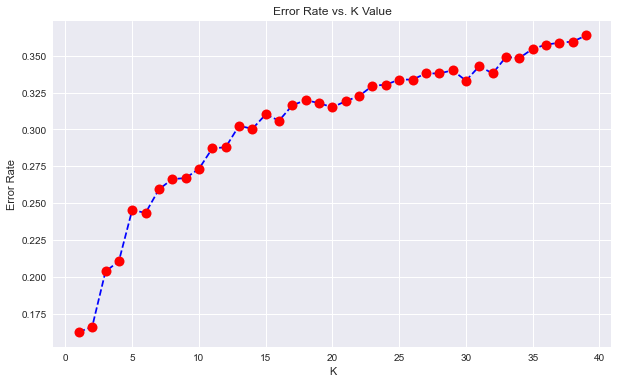

In [58]:
# lets find out the optimal k value for knn
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_knn,y_train_knn)
    pred_i = knn.predict(x_test_knn)
    error_rate.append(np.mean(pred_i != y_test_knn))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.8372739916550765 at K = 0


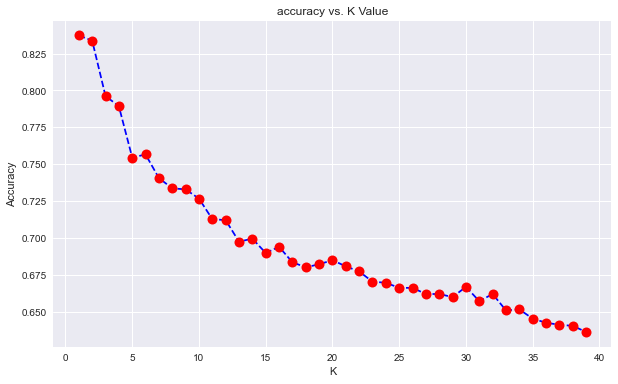

In [59]:
# find desire k value which have high accuracy
acc = []

from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train_knn,y_train_knn)
    ypred = neigh.predict(x_test_knn)
    acc.append(metrics.accuracy_score(y_test_knn, ypred))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [60]:
knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_knn,y_train_knn)
y_pred_knn= knn.predict(x_test_knn)
metrics.accuracy_score(y_test_knn,y_pred_knn)
con_matrix = confusion_matrix(y_test_knn, y_pred_knn) ### confusion matrix
print("Confusion Matrix:")
print(con_matrix )
class_report = classification_report(y_test_knn, y_pred_knn) ### classification report
print("Classification Report:",)
print (class_report)
acc_score = accuracy_score(y_test_knn,y_pred_knn) ### accuracy score
print("Accuracy:",acc_score)

Confusion Matrix:
[[459 260]
 [ 33 686]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.64      0.76       719
           1       0.73      0.95      0.82       719

    accuracy                           0.80      1438
   macro avg       0.83      0.80      0.79      1438
weighted avg       0.83      0.80      0.79      1438

Accuracy: 0.7962447844228094


In [73]:
# calculate recall
recall = recall_score(y_test_knn, y_pred_knn, average='binary')
print('KNN Recall Score: %.3f' % recall)
print("*************************************")


KNN Recall Score: 0.954
*************************************


In [61]:
# predict probabilities
pred_prob_knn = knn.predict_proba(x_test_knn)
fpr_knn, tpr_knn, thresh_knn = roc_curve(y_test_knn, pred_prob_knn[:,1], pos_label=1)
random_probs_knn = [0 for i in range(len(Y_test_rf))]
p_fpr_knn, p_tpr_knn, _ = roc_curve(y_test_knn, random_probs_knn, pos_label=1)
auc_score_knn = roc_auc_score(y_test_knn, pred_prob_knn[:,1])
print(auc_score_knn)

0.8647412474055103


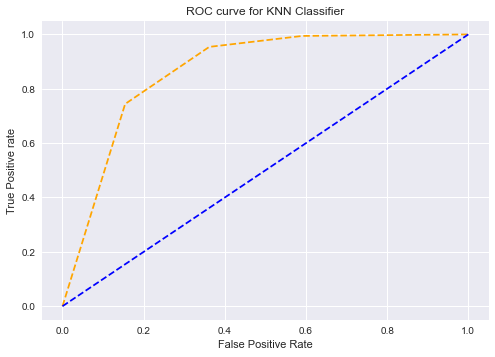

In [62]:
# ploting the roc and auc curve
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr_knn, tpr_knn, linestyle='--',color='orange')
plt.plot(p_fpr_knn, p_tpr_knn, linestyle='--', color='blue')

# title
plt.title('ROC curve for KNN Classifier')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')


plt.savefig('ROC',dpi=300)
plt.show();

# conclusion

### Random Forest Recall Score: 0.87%

### Random Forest AUC score: 96%

### KNN recall score: 0.95%

### KNN AUC score: 0.86%

### ANN Evaluation: loss: 0.6359 - accuracy: 0.6363

In [24]:
# since or data is imbalance, i consider the recall score insted of accuracy,here, knn model has 96% recall score with 86% roc score
# so, i use knn model for predict heart disease and take this model into production.